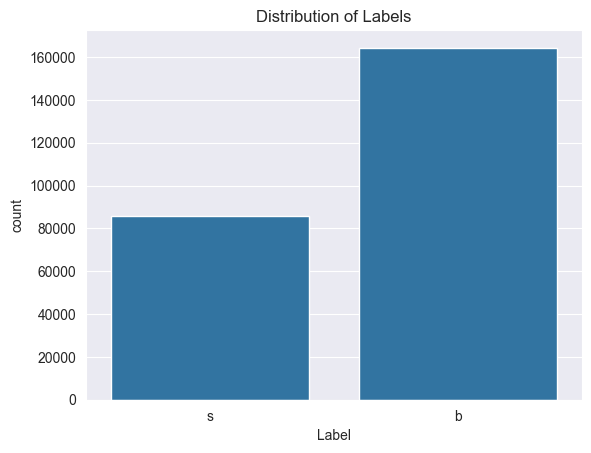

Missing values in training data: 0
Missing values in test data: 0
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82     33065
           1       0.67      0.54      0.59     16935

    accuracy                           0.75     50000
   macro avg       0.73      0.70      0.71     50000
weighted avg       0.74      0.75      0.74     50000

ROC AUC Score: 0.8159307706041606
Confusion Matrix:
 [[28534  4531]
 [ 7865  9070]]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline

# Load the datasets
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')

# Exploratory Data Analysis (Optional Step)
# For example, visualizing the label distribution
sns.countplot(x=train_data['Label'])
plt.title('Distribution of Labels')
plt.show()

# Check for missing values in both datasets
print("Missing values in training data:", train_data.isnull().sum().sum())
print("Missing values in test data:", test_data.isnull().sum().sum())

# Extract features and labels from the training data
X_train = train_data.drop(['EventId', 'Label', 'Weight'], axis=1)
y_train = train_data['Label'].apply(lambda x: 1 if x == 's' else 0)

# Split the training data into training and validation sets
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create a pipeline that includes scaling and logistic regression model
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000)  # Increased the number of iterations
)

# Fit the model on the training part
pipeline.fit(X_train_part, y_train_part)

# Predictions and evaluation on the validation set
y_pred = pipeline.predict(X_val)
y_pred_proba = pipeline.predict_proba(X_val)[:, 1]

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


In [4]:

test_features = test_data.drop(['EventId'], axis=1)  # Adjust if the test set includes any ID or non-feature columns
test_probabilities = pipeline.predict_proba(test_features)[:, 1]

# Generate predictions based on the probability threshold determined earlier
test_predictions = (test_probabilities > 0.5).astype(int)


In [5]:
# Prepare the submission DataFrame
submission = pd.DataFrame({
    'EventId': test_data['EventId'],
    'RankOrder': np.argsort(np.argsort(-test_probabilities)) + 1,  # Kaggle often requires a rank ordering
    'Class': ['s' if x else 'b' for x in test_predictions]
})

# Save the submission file
submission.to_csv('higgs_boson_submission.csv', index=False)
print("Submission file saved successfully!")


Submission file saved successfully!
